In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sys

sys.path.insert(0, '/Users/arshianayebnazar/Documents/GitHub/DroughtPrediction/src/')

from Models.lstm import getModel

In [2]:
df = pd.read_csv('/Users/arshianayebnazar/Documents/GitHub/DroughtPrediction/src/data/cleandrought2010-2022.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,None,D0,D1,D2,D3,D4
0,0.0,0.22,2.31,37.66,47.07,12.74
1,0.0,0.22,2.31,37.66,47.07,12.74
2,0.0,0.20,2.31,37.67,47.07,12.74
3,0.0,0.20,2.31,37.67,48.22,11.59
4,0.0,0.21,2.31,37.67,48.22,11.59


In [17]:
training = df.iloc[0:len(df)-104, :].values
test = df.iloc[len(df)-104:].values

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)
testing_scaled = sc.fit_transform(test)

In [73]:
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(52, len(training_scaled)):
    X_train.append(training_scaled[i-52:i, :])
    y_train.append(training_scaled[i, :])

for i in range(52, len(testing_scaled)):
    X_test.append(testing_scaled[i-52:i, :])
    y_test.append(testing_scaled[i, :])

In [74]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))

In [83]:
EPOCHS = 200
BATCH_SIZE = 32

In [84]:
model = getModel(X_train)
model.fit(X_train, y_train, epochs=EPOCHS, batch_size = 32)

Epoch 1/200
15/15 [==============================] - 7s 60ms/step - loss: 0.0668
Epoch 2/200
15/15 [==============================] - 1s 49ms/step - loss: 0.0334
Epoch 3/200
15/15 [==============================] - 1s 50ms/step - loss: 0.0278
Epoch 4/200
15/15 [==============================] - 1s 46ms/step - loss: 0.0248
Epoch 5/200
15/15 [==============================] - 1s 50ms/step - loss: 0.0221
Epoch 6/200
15/15 [==============================] - 1s 53ms/step - loss: 0.0204
Epoch 7/200
15/15 [==============================] - 1s 52ms/step - loss: 0.0195
Epoch 8/200
15/15 [==============================] - 1s 48ms/step - loss: 0.0190
Epoch 9/200
15/15 [==============================] - 1s 47ms/step - loss: 0.0185
Epoch 10/200
15/15 [==============================] - 1s 50ms/step - loss: 0.0169
Epoch 11/200
15/15 [==============================] - 1s 47ms/step - loss: 0.0170
Epoch 12/200
15/15 [==============================] - 1s 53ms/step - loss: 0.0162
Epoch 13/200
15/15 [=====

In [85]:
yhat = model.predict(X_test)

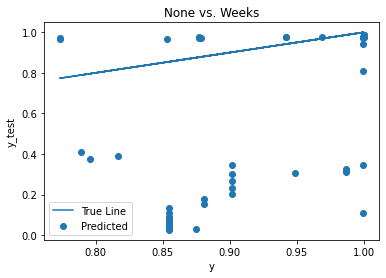

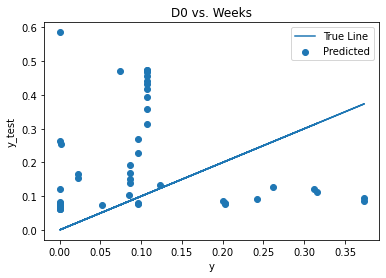

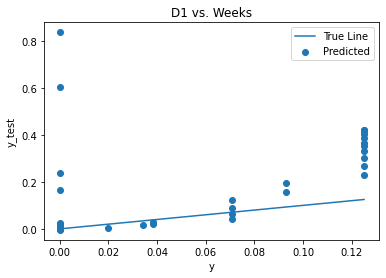

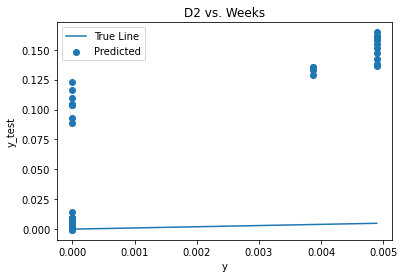

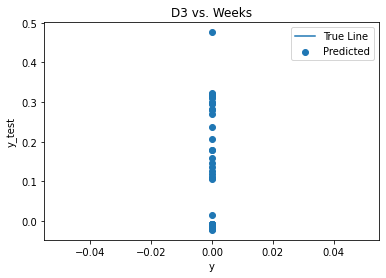

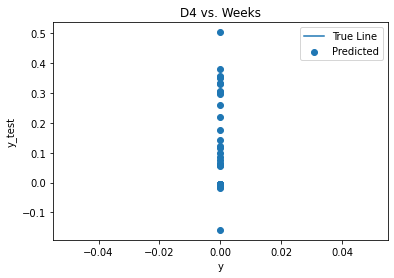

In [86]:
divisions = df.columns

for i in range(len(divisions)):
    curr = yhat[:, i]
    plt.title(divisions[i] + " vs. Weeks")
    plt.ylabel("y_test")
    plt.xlabel("y")
    plt.plot(y_test[:, i], y_test[:, i], label="True Line")
    plt.scatter(y_test[:, i], curr, label="Predicted")
    plt.legend()
    plt.show()

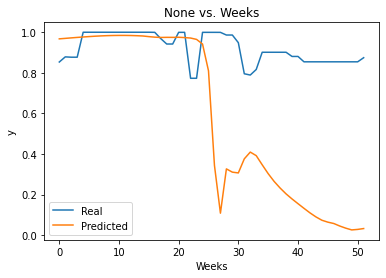

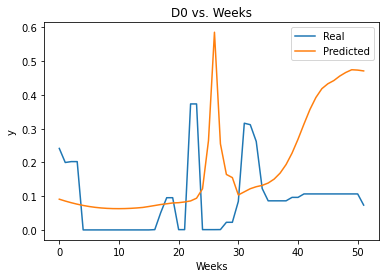

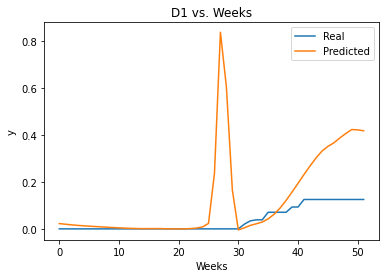

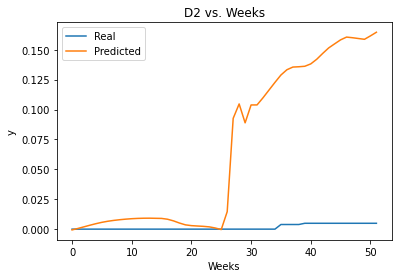

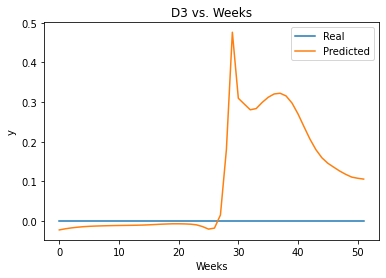

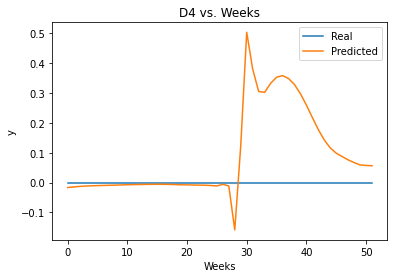

In [87]:
divisions = df.columns

for i in range(len(divisions)):
    curr = yhat[:, i]
    plt.title(divisions[i] + " vs. Weeks")
    plt.ylabel("y")
    plt.xlabel("Weeks")
    plt.plot(np.arange(len(y_test)), y_test[:, i], label="Real")
    plt.plot(np.arange(len(y_test)), yhat[:, i], label="Predicted")
    plt.legend()
    plt.show()